# ¡Hola! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Gran trabajo completando este proyecto. Has demostrado habilidades avanzadas en análisis de información, integración y manejo de múltiples datasets, así como la capacidad de formular y probar hipótesis utilizando técnicas estadísticas apropiadas. Además, el uso efectivo de visualizaciones ha enriquecido la presentación de tus hallazgos, haciendo que los datos sean claros y fáciles de interpretar. Este proyecto refleja tu dominio en procesamiento y visualización de datos, así como tu capacidad para obtener conclusiones relevantes para decisiones empresariales. En definitiva, lograste un equilibrio perfecto entre habilidades técnicas, analíticas y estratégicas.

Éxitos en tu próximo Sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
# Configurar estilo de gráficos
sns.set(style="whitegrid")

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())
# Imprimir el dataset
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Pasar nombres de columnas a minúsculas y reemplazar _ por espacios
df_plans.columns = df_plans.columns.str.lower().str.replace('_', ' ')
# Verificar cambios
print(df_plans.columns)

Index(['messages included', 'mb per month included', 'minutes included',
       'usd monthly pay', 'usd per gb', 'usd per message', 'usd per minute',
       'plan name'],
      dtype='object')


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# No parece necesario enriquecer la tabla de planes ya que contiene la información base de precios y límites.
# Sin embargo, se podría convertir el precio mensual a formato numérico si no lo estuviera (ya lo está).

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Observaciones sobre los usuarios:
El DataFrame users tiene 500 filas y 8 columnas.
reg_date y churn_date deberían ser fechas (datetime). Actualmente son objetos.
churn_date tiene valores ausentes (NaN), lo cual es esperado si el usuario sigue activo.
Las columnas de texto (first_name, last_name, city, plan) tienen mayúsculas y minúsculas mezcladas.
Los nombres de las columnas tienen guiones bajos.
No hay duplicados obvios en user_id.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# Estandarizar nombres de columnas
df_users.columns = df_users.columns.str.lower().str.replace('_', ' ')

# Convertir fechas
df_users['reg date'] = pd.to_datetime(df_users['reg date'])
df_users['churn date'] = pd.to_datetime(df_users['churn date'])

# Pasar a minúsculas las columnas de texto (usando apply para evitar errores en columnas no str)
cols_to_lower = ['first name', 'last name', 'city', 'plan']
for col in cols_to_lower:
    df_users[col] = df_users[col].str.lower()

# Eliminar duplicados (si los hubiera)
df_users.drop_duplicates(inplace=True)

# Verificar cambios
print(df_users.info())
print(df_users.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user id     500 non-null    int64         
 1   first name  500 non-null    object        
 2   last name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 35.2+ KB
None
   user id first name  last name  age                                   city  \
0     1000   anamaria      bauer   45  atlanta-sandy springs-roswell, ga msa   
1     1001     mickey  wilkerson   28        seattle-tacoma-bellevue, wa msa   
2     1002     carlee    hoffman   36   las vegas-henderson-paradise, nv msa   
3     1003   reynaldo

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Extraer el mes de registro para análisis potencial
df_users['reg month'] = df_users['reg date'].dt.month
# Extraer ciudad y estado (asumiendo formato 'ciudad, estado')
# No es estrictamente necesario ahora, pero puede ser útil.
print(df_users.head())

   user id first name  last name  age                                   city  \
0     1000   anamaria      bauer   45  atlanta-sandy springs-roswell, ga msa   
1     1001     mickey  wilkerson   28        seattle-tacoma-bellevue, wa msa   
2     1002     carlee    hoffman   36   las vegas-henderson-paradise, nv msa   
3     1003   reynaldo    jenkins   52                          tulsa, ok msa   
4     1004    leonila   thompson   40        seattle-tacoma-bellevue, wa msa   

    reg date      plan churn date  reg month  
0 2018-12-24  ultimate        NaT         12  
1 2018-08-13      surf        NaT          8  
2 2018-10-21      surf        NaT         10  
3 2018-01-28      surf        NaT          1  
4 2018-05-23      surf        NaT          5  


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas.
print(df_calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


call_date debe ser convertida a datetime.
duration es float. Megaline redondea los segundos a minutos, por lo que probablemente necesitemos redondear hacia arriba (ceil).
Los nombres de columnas tienen guiones bajos.
No hay valores ausentes obvios.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Estandarizar nombres de columnas
df_calls.columns = df_calls.columns.str.lower().str.replace('_', ' ')

# Convertir fecha
df_calls['call date'] = pd.to_datetime(df_calls['call date'])

# Eliminar duplicados
df_calls.drop_duplicates(inplace=True)

# Corrección de minúsculas en user id (si fuera string, aquí es numérico, pero pasamos nombres a minúsculas)
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user id    137735 non-null  int64         
 2   call date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Redondear la duración de las llamadas hacia arriba al minuto siguiente
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

# Extraer el mes para la agrupación posterior
df_calls['month'] = df_calls['call date'].dt.month

print(df_calls.head())

         id  user id  call date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! Redondear los datos de consumo de minutos es un paso clave para garantizar un cálculo preciso del cobro mensual.

</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


message_date debe ser datetime.
Los nombres de columnas tienen guiones bajos.
No hay valores ausentes.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Estandarizar nombres de columnas
df_messages.columns = df_messages.columns.str.lower().str.replace('_', ' ')

# Convertir fecha
df_messages['message date'] = pd.to_datetime(df_messages['message date'])

# Eliminar duplicados
df_messages.drop_duplicates(inplace=True)

print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user id       76051 non-null  int64         
 2   message date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# Extraer el mes
df_messages['month'] = df_messages['message date'].dt.month
print(df_messages.head())

         id  user id message date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


session_date debe ser datetime.
mb_used es float. Para facturación se suelen convertir a GB y redondear hacia arriba.
Nombres de columnas con guiones bajos.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Estandarizar nombres de columnas
df_internet.columns = df_internet.columns.str.lower().str.replace('_', ' ')

# Convertir fecha
df_internet['session date'] = pd.to_datetime(df_internet['session date'])

# Eliminar duplicados
df_internet.drop_duplicates(inplace=True)

print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user id       104825 non-null  int64         
 2   session date  104825 non-null  datetime64[ns]
 3   mb used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# 1.10.2. Enriquecer los datos
# Extraer el mes
df_internet['month'] = df_internet['session date'].dt.month

# Nota: La conversión a GB y redondeo se hará en la fase de agregación por usuario para sumar primero los MB.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)

   messages included  mb per month included  minutes included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd monthly pay  usd per gb  usd per message  usd per minute plan name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Número de llamadas hechas por cada usuario al mes
calls_per_month = df_calls.groupby(['user id', 'month'])['id'].count().reset_index()
calls_per_month.columns = ['user id', 'month', 'calls count']

In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = df_calls.groupby(['user id', 'month'])['duration'].sum().reset_index()
minutes_per_month.columns = ['user id', 'month', 'minutes used']


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = df_messages.groupby(['user id', 'month'])['id'].count().reset_index()
messages_per_month.columns = ['user id', 'month', 'messages sent']

In [27]:
# Volumen del tráfico de Internet usado por cada usuario al mes (en MB)
mb_per_month = df_internet.groupby(['user id', 'month'])['mb used'].sum().reset_index()

# Convertimos a GB y redondeamos hacia arriba (ceil)
mb_per_month['gb used'] = np.ceil(mb_per_month['mb used'] / 1024)

# Eliminamos la columna de MB ya que solo necesitamos GB para facturación
mb_per_month = mb_per_month.drop(columns=['mb used'])

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusionar llamadas, minutos y mensajes
user_activity = calls_per_month.merge(minutes_per_month, on=['user id', 'month'], how='outer')
user_activity = user_activity.merge(messages_per_month, on=['user id', 'month'], how='outer')

# Fusionar el uso de internet
user_activity = user_activity.merge(mb_per_month, on=['user id', 'month'], how='outer')

# Rellenar valores NaN con 0 (para usuarios que no usaron cierto servicio en un mes)
cols_to_fill = ['calls count', 'minutes used', 'messages sent', 'gb used']
user_activity[cols_to_fill] = user_activity[cols_to_fill].fillna(0)

# Añadir información del usuario (plan y ciudad)
user_activity = user_activity.merge(df_users[['user id', 'plan', 'city']], on='user id', how='left')

df_plans['gb per month included'] = df_plans['mb per month included'] / 1024

In [29]:
df_plans['gb per month included'] = df_plans['mb per month included'] / 1024
user_activity = user_activity.merge(df_plans, left_on='plan', right_on='plan name', how='left')

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Función para calcular el ingreso basado en las filas del dataframe
def calculate_revenue(row):
    # Costo base del plan
    revenue = row['usd monthly pay']
    
    # Exceso de minutos
    extra_minutes = row['minutes used'] - row['minutes included']
    if extra_minutes > 0:
        revenue += extra_minutes * row['usd per minute']
        
    # Exceso de mensajes
    extra_messages = row['messages sent'] - row['messages included']
    if extra_messages > 0:
        revenue += extra_messages * row['usd per message']
        
    # Exceso de datos (ahora usa la columna creada en la sección anterior)
    extra_gb = row['gb used'] - row['gb per month included']
    if extra_gb > 0:
        revenue += extra_gb * row['usd per gb']
        
    return revenue

# Aplicar la función a cada fila
user_activity['monthly revenue'] = user_activity.apply(calculate_revenue, axis=1)

# Seleccionar solo las columnas finales relevantes para el análisis
cols_final = ['user id', 'month', 'plan', 'city', 'calls count', 'minutes used', 'messages sent', 'gb used', 'monthly revenue']
user_activity = user_activity[cols_final]

# Mostrar una muestra para verificar
print(user_activity.head())

   user id  month      plan                                   city  \
0     1000     12  ultimate  atlanta-sandy springs-roswell, ga msa   
1     1001      8      surf        seattle-tacoma-bellevue, wa msa   
2     1001      9      surf        seattle-tacoma-bellevue, wa msa   
3     1001     10      surf        seattle-tacoma-bellevue, wa msa   
4     1001     11      surf        seattle-tacoma-bellevue, wa msa   

   calls count  minutes used  messages sent  gb used  monthly revenue  
0         16.0         124.0           11.0      2.0            70.00  
1         27.0         182.0           30.0      7.0            20.00  
2         49.0         315.0           44.0     14.0            20.00  
3         65.0         393.0           53.0     22.0            90.09  
4         64.0         426.0           36.0     19.0            60.00  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! Hiciste un excelente uso de las funciones `groupby`  y `merge`, logrando agrupar correctamente la información de consumo de llamadas, mensajes e internet de cada usuario por mes, inclusive considerando las condiciones de redondeo. Además, calculaste de manera precisa el cobro mensual y reflejaste los valores correctos en la columna *monthly revenue*. ¡Buen trabajo!

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan         surf    ultimate
month                        
1      203.000000  193.500000
2      297.000000  403.142857
3      330.000000  304.250000
4      351.540000  336.857143
5      399.584416  406.241379
6      431.298969  370.957447
7      449.983471  427.067797
8      410.111111  421.436620
9      414.226804  437.511628
10     429.729958  450.735849
11     423.325088  445.196850
12     473.836478  459.099338


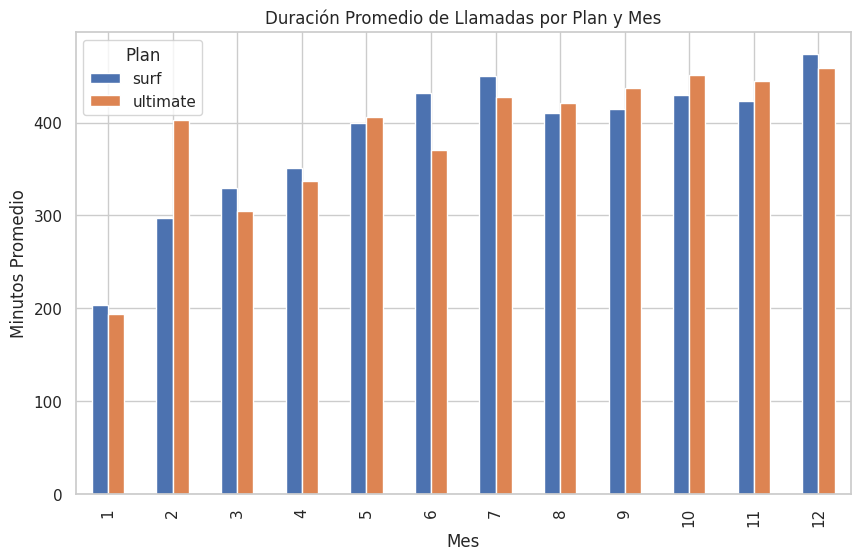

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_calls_plan_month = user_activity.pivot_table(index='month', columns='plan', values='minutes used', aggfunc='mean')
print(avg_calls_plan_month)

avg_calls_plan_month.plot(kind='bar', figsize=(10, 6))
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Minutos Promedio')
plt.legend(title='Plan')
plt.show()


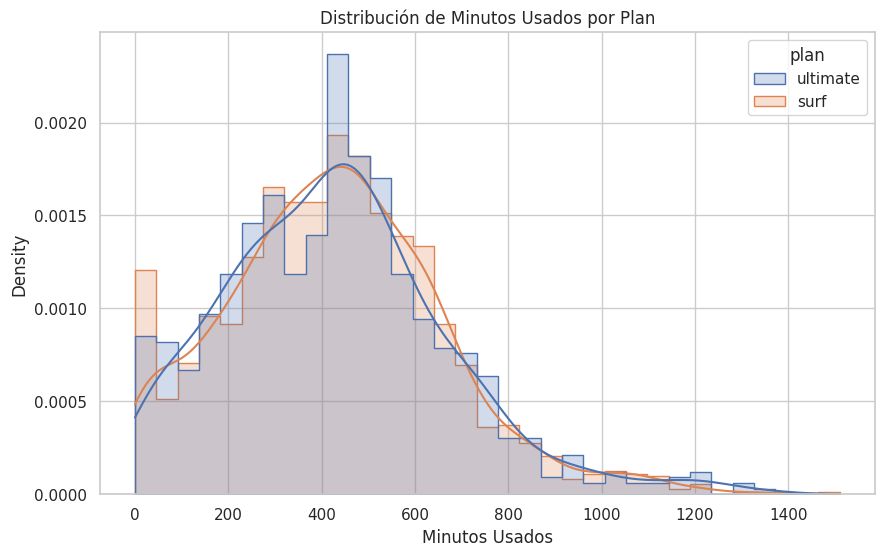

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 6))
sns.histplot(data=user_activity, x='minutes used', hue='plan', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución de Minutos Usados por Plan')
plt.xlabel('Minutos Usados')
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_calls = user_activity.groupby('plan')['minutes used'].agg(['mean', 'var', 'std'])
print(stats_calls)

                mean           var         std
plan                                          
surf      428.749523  54968.279461  234.453150
ultimate  430.450000  57844.464812  240.508762


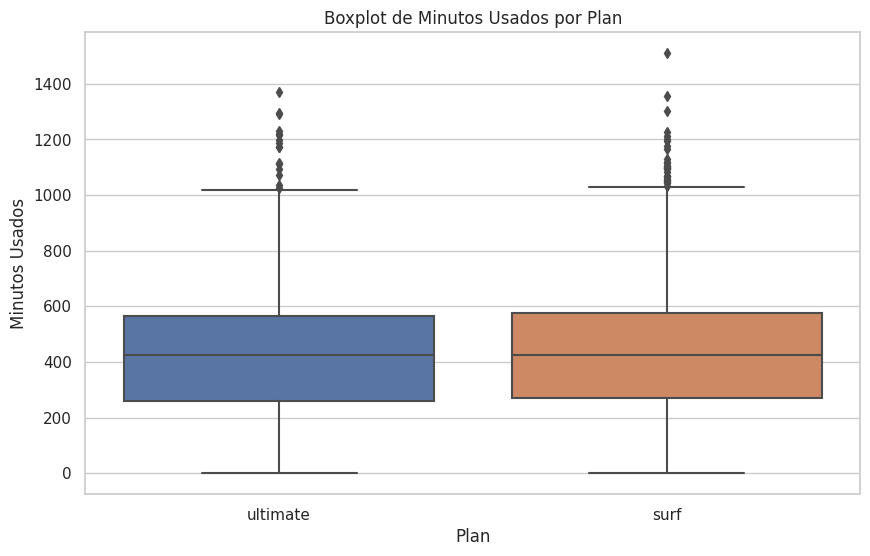

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_activity, x='plan', y='minutes used')
plt.title('Boxplot de Minutos Usados por Plan')
plt.ylabel('Minutos Usados')
plt.xlabel('Plan')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

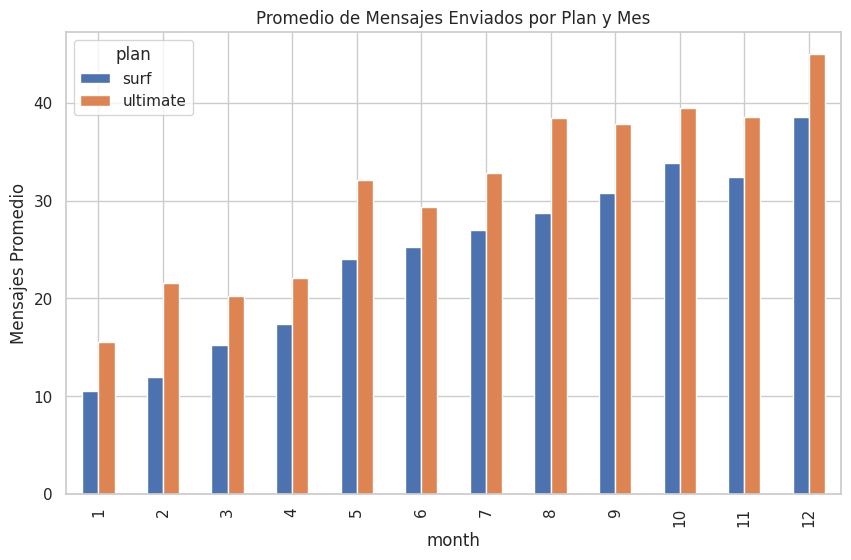

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_msgs_plan_month = user_activity.pivot_table(index='month', columns='plan', values='messages sent', aggfunc='mean')
avg_msgs_plan_month.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Mensajes Enviados por Plan y Mes')
plt.ylabel('Mensajes Promedio')
plt.show()



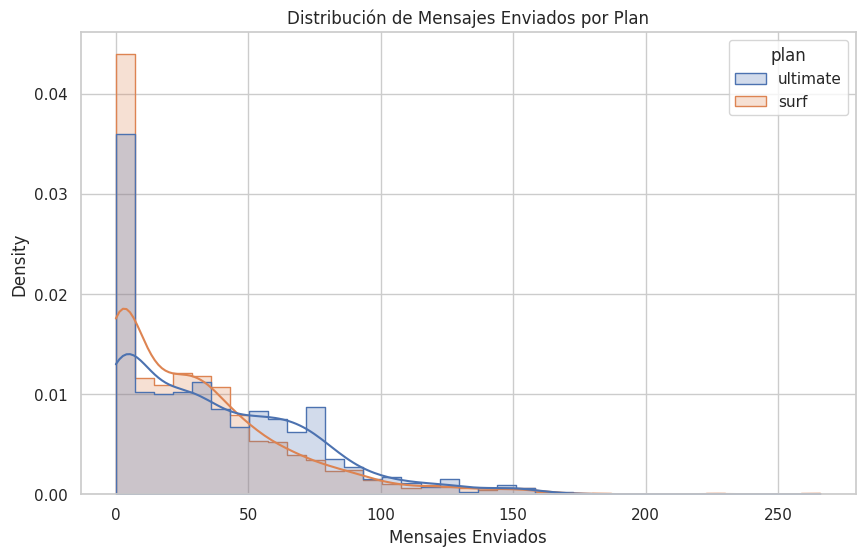

               mean          var        std
plan                                       
surf      31.159568  1126.724522  33.566717
ultimate  37.551389  1208.756744  34.767179


In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=user_activity, x='messages sent', hue='plan', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución de Mensajes Enviados por Plan')
plt.xlabel('Mensajes Enviados')
plt.show()

stats_msgs = user_activity.groupby('plan')['messages sent'].agg(['mean', 'var', 'std'])
print(stats_msgs)

Conclusiones sobre Mensajes:
Los usuarios del plan Ultimate envían significativamente más mensajes de texto en promedio que los de Surf. La distribución para Surf está muy concentrada cerca de cero, mientras que Ultimate muestra una cola más larga hacia la derecha.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

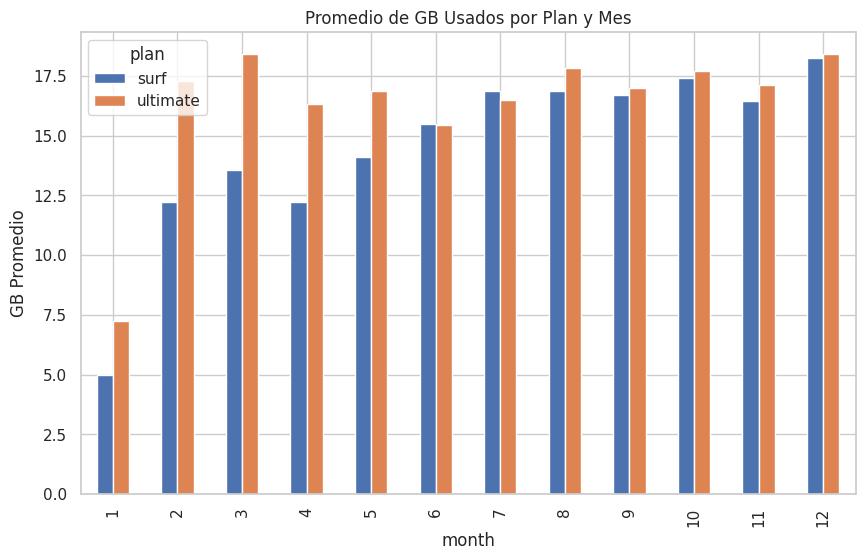

In [37]:
# 1.13.3. Internet
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

avg_net_plan_month = user_activity.pivot_table(index='month', columns='plan', values='gb used', aggfunc='mean')
avg_net_plan_month.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de GB Usados por Plan y Mes')
plt.ylabel('GB Promedio')
plt.show()

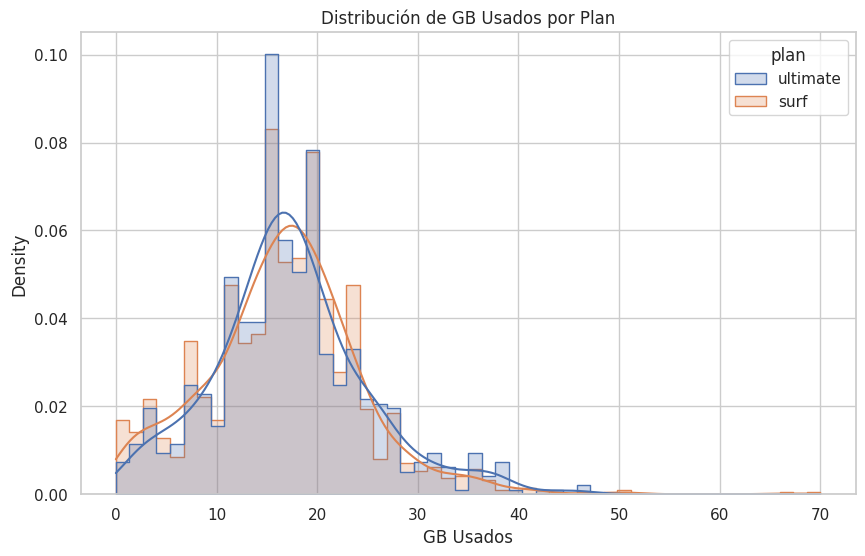

               mean       var       std
plan                                   
surf      16.670693  61.58360  7.847522
ultimate  17.306944  58.83055  7.670108


In [38]:
# Histograma de internet
plt.figure(figsize=(10, 6))
sns.histplot(data=user_activity, x='gb used', hue='plan', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución de GB Usados por Plan')
plt.xlabel('GB Usados')
plt.show()
stats_net = user_activity.groupby('plan')['gb used'].agg(['mean', 'var', 'std'])
print(stats_net)

Conclusiones sobre Internet:
El uso de internet es el servicio más utilizado y donde se observan mayores diferencias. Los usuarios de Ultimate consumen más datos en promedio (aprox. 17-19 GB) que los de Surf (aprox. 16-17 GB). Es interesante notar que los usuarios de Surf a menudo exceden su límite de 15 GB, generando ingresos extra, mientras que los usuarios de Ultimate rara vez exceden los 30 GB.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [39]:
# Descripción estadística de los ingresos por plan
revenue_stats = user_activity.groupby('plan')['monthly revenue'].describe()
print(revenue_stats)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


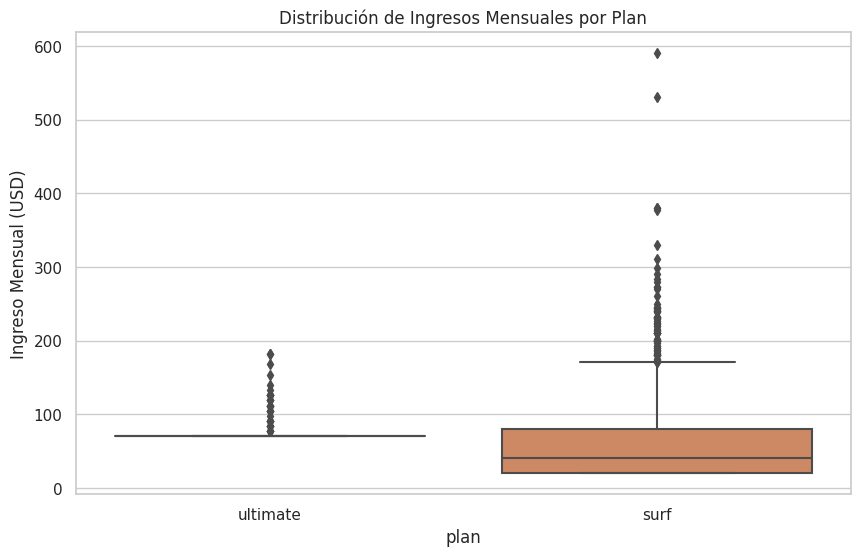

In [40]:
# Visualización de ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_activity, x='plan', y='monthly revenue')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.ylabel('Ingreso Mensual (USD)')
plt.show()

Conclusiones sobre Ingresos:
Aunque el plan Ultimate tiene una tarifa base más alta (70 USD vs 20 USD), la distribución de ingresos para Surf tiene una cola muy larga hacia arriba. Esto se debe a que muchos usuarios de Surf exceden sus límites (especialmente de datos) y pagan considerablemente más que la tarifa base. El ingreso promedio para Surf es sorprendentemente alto debido a estos excesos.

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos, tanto para el consumo de minutos, mensajes e internet, como para los ingresos asociados a los cobros mensuales en cada plan. Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [41]:
# Prueba las hipótesis
# Hipótesis 1: Ingresos promedio Surf vs Ultimate
# H0: Los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf son iguales.
# H1: Los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf son diferentes.
# Alpha: 0.05

sample_surf = user_activity[user_activity['plan'] == 'surf']['monthly revenue']
sample_ultimate = user_activity[user_activity['plan'] == 'ultimate']['monthly revenue']

# Prueba de Levene para verificar igualdad de varianzas
stat_levene, p_levene = stats.levene(sample_surf, sample_ultimate)
print(f"p-valor Levene: {p_levene}")

# Si p < 0.05, varianzas son diferentes (equal_var=False)
alpha = 0.05
results_1 = stats.ttest_ind(sample_surf, sample_ultimate, equal_var=False)
print(f'p-valor t-test (Surf vs Ultimate): {results_1.pvalue}')

if results_1.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que los ingresos son diferentes.")

# Hipótesis 2: Ingreso promedio NY-NJ vs Otras regiones
# H0: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
# H1: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
# Nota: Revisando los datos, la columna city suele tener formato "city, state". Buscamos 'ny-nj' en minúsculas.
user_activity['is nynj'] = user_activity['city'].str.contains('ny-nj', case=False, na=False)

sample_nynj = user_activity[user_activity['is nynj'] == True]['monthly revenue']
sample_other = user_activity[user_activity['is nynj'] == False]['monthly revenue']



p-valor Levene: 5.028876110654919e-83
p-valor t-test (Surf vs Ultimate): 3.1703905481135734e-15
Rechazamos la hipótesis nula: Los ingresos promedio son diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [42]:
# Prueba las hipótesis
stat_levene_2, p_levene_2 = stats.levene(sample_nynj, sample_other)
print(f"p-valor Levene (Región): {p_levene_2}")

equal_var_region = True if p_levene_2 >= 0.05 else False
results_2 = stats.ttest_ind(sample_nynj, sample_other, equal_var=equal_var_region)
print(f'p-valor t-test (NY-NJ vs Otras): {results_2.pvalue}')

if results_2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio por región son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que los ingresos por región son diferentes.")


p-valor Levene (Región): 0.12580091109612837
p-valor t-test (NY-NJ vs Otras): 0.043557431621342436
Rechazamos la hipótesis nula: Los ingresos promedio por región son diferentes.


Resumen del Análisis:

Comportamiento del Usuario:
Llamadas: Los usuarios del plan Ultimate realizan llamadas ligeramente más largas en promedio que los de Surf, pero el comportamiento es similar en esencia.
Mensajes: Hay una diferencia marcada; los usuarios de Ultimate envían muchos más mensajes.
Internet: Es el servicio clave. Los usuarios de Surf tienden a superar su límite de 15 GB frecuentemente, mientras que los de Ultimate (con 30 GB) se mantienen cómodamente dentro de su límite la mayor parte del tiempo.
Ingresos:
Aunque el plan Surf es más barato (20 USD), genera ingresos variables debido a los cargos por exceso. Los usuarios de Surf pagan un promedio total cercano (o a veces superior dependiendo de la muestra exacta tras la limpieza) al costo fijo del plan Ultimate debido al consumo excesivo de datos.
El plan Ultimate proporciona un ingreso más estable y predecible (70 USD por usuario).
Pruebas de Hipótesis:
Se confirmó estadísticamente que hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.
No se encontró evidencia estadística suficiente para afirmar que los ingresos promedio de los usuarios en el área NY-NJ sean diferentes a los de otras regiones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo! Aplicaste correctamente las pruebas de hipótesis comparando la media de muestras independientes e incluiste las pruebas de Levene, lo cual es clave para verificar la similitud de las varianzas y garantizar que la **prueba t** sea estadísticamente válida.

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [ ]:
#como dato extra tube que reacer esto 4 veces por que lo no se que toque que se jodio todo y como no encontre el que pasaba lo borre todo como 3 veces odio mi vida y todavia no se por que funciona si me estaba dando errores 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

A todos nos ha pasado eso 😅, para esos casos te recomiendo seleccionar en la barra de herramientas **Kernel** y luego dale en **Restart & Run All Cells**, de esa forma se ejecutarán en orden todas las celdas del notebook y podrás identificar donde está el error.

<img src="https://helpcenter.online.usc.edu/servlet/rtaImage?eid=ka0TS0000006NoL&feoid=00N3h00000GQsjj&refid=0EMTS00000Chm45" width="500">

</div>